In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import uns
import pandas as pd
import os
import glob

folder = r'/Users/chrisv/Code/CDIPS'

#imfolder='/home/chrisv/code/test'
predfolder = folder + '/test_output'
pattern = os.path.join(predfolder, '{}_prediction.npy')
fnames = glob.glob(pattern.format('*'))


chrisv on Mac


In [2]:
indices = np.argsort([int(f.split('/')[-1].split('_')[0]) for f in fnames])
orderedfnames = [fnames[i] for i in indices]


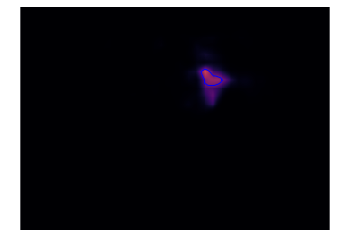

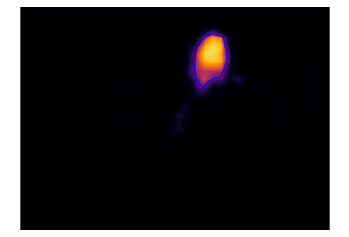

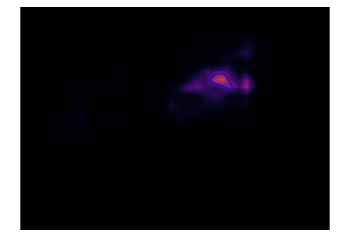

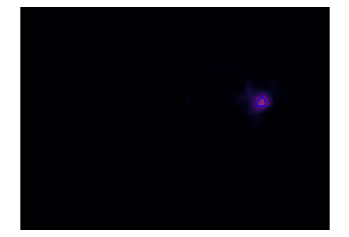

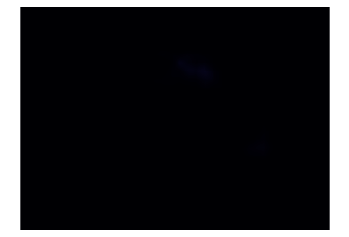

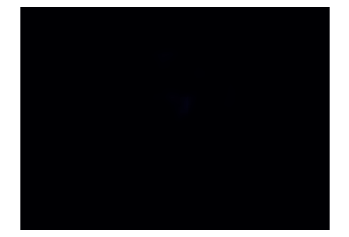

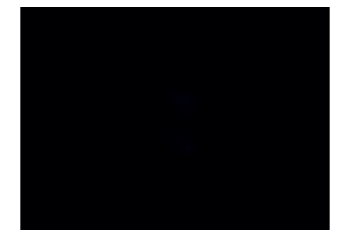

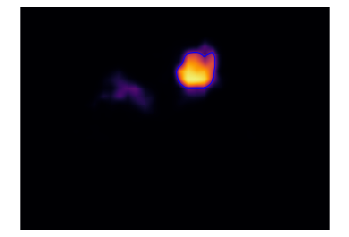

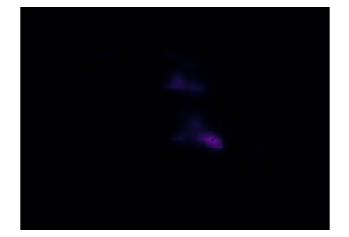

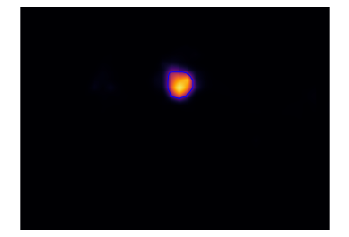

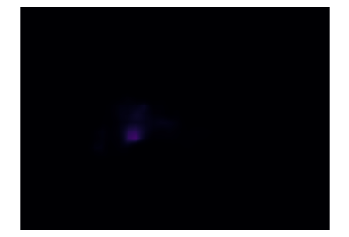

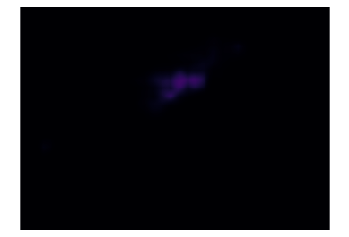

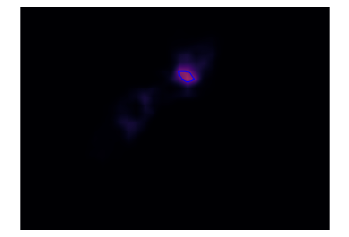

In [37]:
RLE = []
for i, f in enumerate(orderedfnames, 1):
    # Load the prediction file
    pred = uns.prediction(f, untrim=2)
    # Apply masking function
    pred.new_prediction('30',lambda x:x>0.3)
    
    # Apply size-based cutoff and output RLE
    pixelcount = np.sum(pred.predmasks['30'].image)/255
    if pixelcount < 4000:
        RLE.append((i,''))
    else:
        RLE.append((i,pred.predmasks['30'].RLE))
                   
    # Plot every 400
    if i%400 == 0:
        pred.heatmap()
        plt.show()


In [8]:
mask = pred.predmasks['50'].image


In [38]:
out = '\n'.join('{i},{rle}'.format(i=r[0],rle=r[1]) for r in RLE)
with open('output.csv','w') as f:
    f.write('img,pixels\n')
    f.write(out)

In [30]:
orderedfnames[:10]

['/Users/chrisv/Code/CDIPS/test_output/1_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/2_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/3_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/4_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/5_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/6_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/7_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/8_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/9_prediction.npy',
 '/Users/chrisv/Code/CDIPS/test_output/10_prediction.npy']

In [31]:
indices[:10]

array([1110, 2221, 3332, 4443, 5063, 5174, 5285, 5396, 5507,  110])